# Завдання 6

## Робота з датасетом `data_2d.csv`

### Знаходимо кількість кластерів

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [189]:
# Load the dataset
df_data_2d = pd.read_csv('data_2d.csv', header=None)
df_data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [190]:
# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_data_2d)
    inertia.append(kmeans.inertia_)


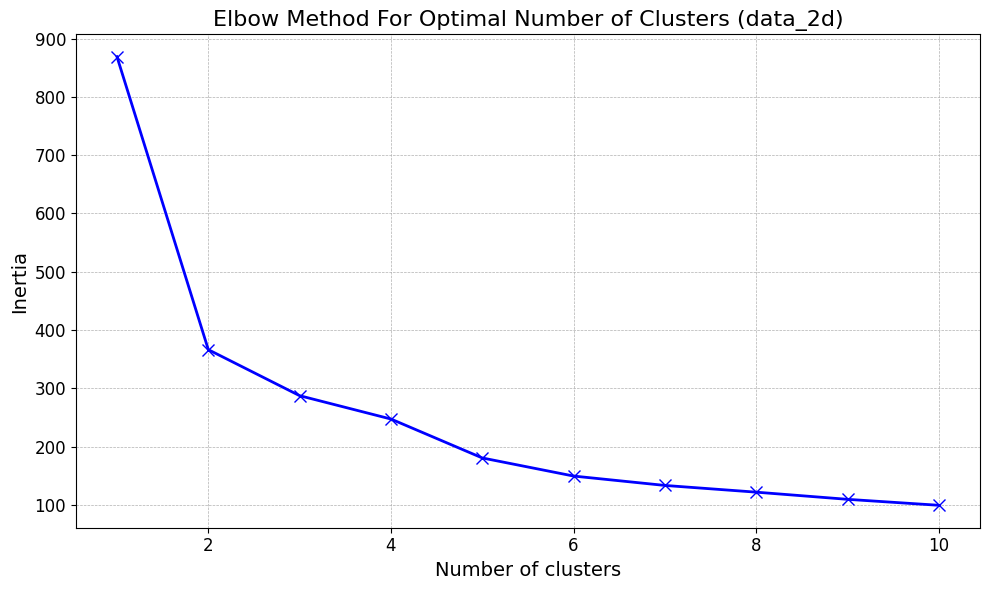

In [191]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-', markersize=8, linewidth=2)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method For Optimal Number of Clusters (data_2d)', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [192]:
# Perform K-means clustering with the optimal number of clusters
k_opt = 2
kmeans_opt = KMeans(n_clusters=k_opt, max_iter=300, random_state=42, n_init='auto')
kmeans_opt.fit(df_data_2d)


KMeans(n_clusters=2, n_init='auto', random_state=42)

## Візуалізація

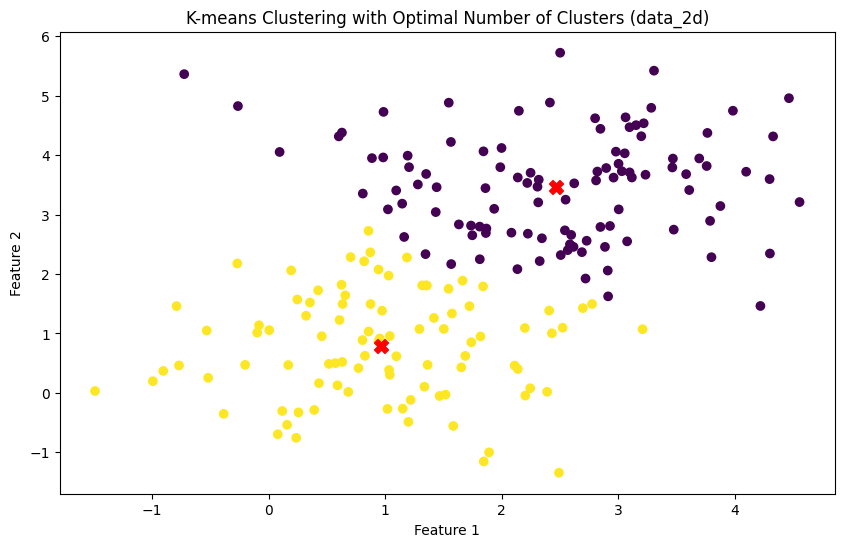

In [193]:
df_data_2d['Cluster'] = kmeans_opt.labels_

plt.figure(figsize=(10, 6))
plt.scatter(df_data_2d.iloc[:, 1], df_data_2d.iloc[:, 2], c=df_data_2d['Cluster'], cmap='viridis', label='Cluster')
plt.scatter(kmeans_opt.cluster_centers_[:, 1], kmeans_opt.cluster_centers_[:, 2], s=100, c='red', marker='X', label = 'Centroid')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering with Optimal Number of Clusters (data_2d)')
plt.show()


## Робота з датасетом `mnist.csv`

In [194]:
# Load the dataset
df_data_mnist = pd.read_csv('mnist.csv', header=None)
df_data_mnist


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
max_clusters = 15
inertia = []
for k in range(1, max_clusters + 1):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_data_mnist)
  inertia.append(kmeans.inertia_)
  print(f'Fit {k} clusters')

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters


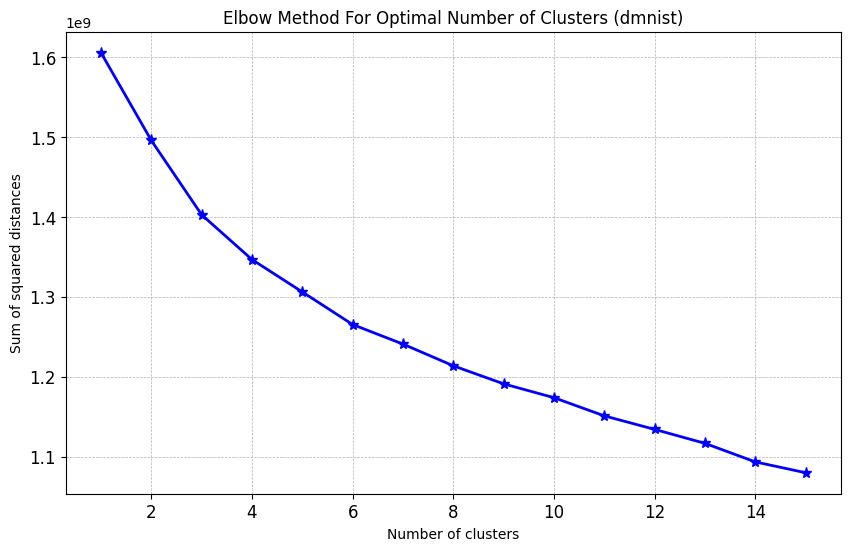

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, 'b*-', markersize=8, linewidth=2)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method For Optimal Number of Clusters (dmnist)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [197]:
# Apply PCA scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data_mnist)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_data_mnist)

In [198]:
# Lets check max 15 clusters
max_clusters = 15
inertia = []
for k in range(1, max_clusters + 1):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(pca_data )
  inertia.append(kmeans.inertia_)
  print(f'Fit {k} clusters after PCA')

Fit 1 clusters after PCA
Fit 2 clusters after PCA
Fit 3 clusters after PCA
Fit 4 clusters after PCA
Fit 5 clusters after PCA
Fit 6 clusters after PCA
Fit 7 clusters after PCA
Fit 8 clusters after PCA
Fit 9 clusters after PCA
Fit 10 clusters after PCA
Fit 11 clusters after PCA
Fit 12 clusters after PCA
Fit 13 clusters after PCA
Fit 14 clusters after PCA
Fit 15 clusters after PCA


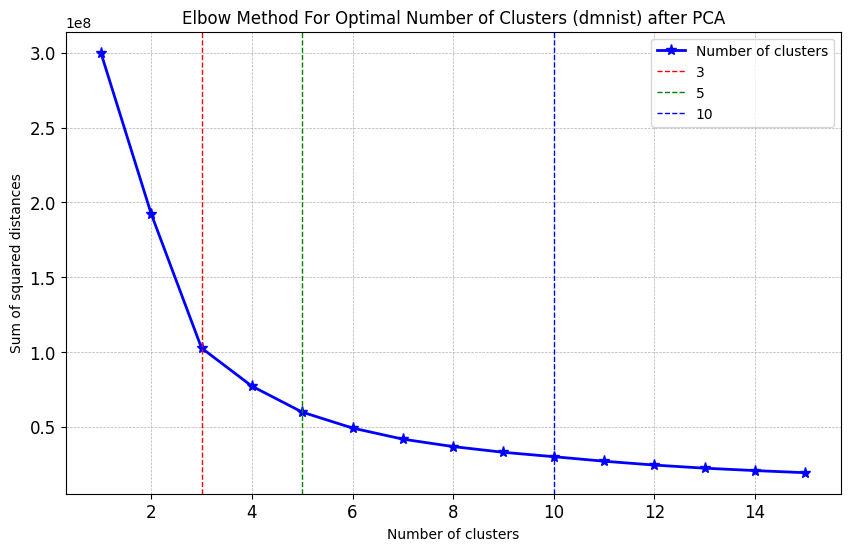

In [199]:
# Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, 'b*-', markersize=8, linewidth=2)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method For Optimal Number of Clusters (dmnist) after PCA")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x=3, color='r', linestyle='--', linewidth=1, label='x=3')
plt.axvline(x=5, color='g', linestyle='--', linewidth=1, label='x=5')
plt.axvline(x=10, color='b', linestyle='--', linewidth=1, label='x=10')
plt.legend(['Number of clusters', '3', '5', '10'])
plt.show()

In [200]:
def plot_clusters(k=3):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmeans.fit(pca_data)
    cluster_labels = kmeans.labels_
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red')
    plt.title(f'K-Means Clustering for mnist.csv ({k} clusters)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()

### Візуалізація

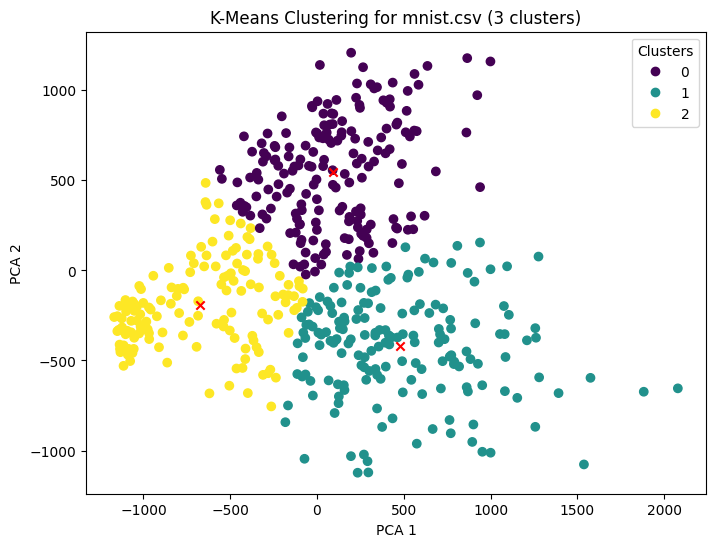

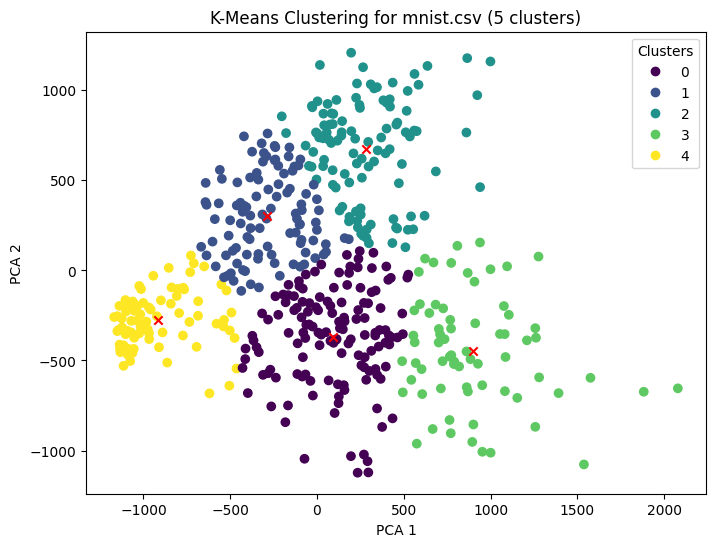

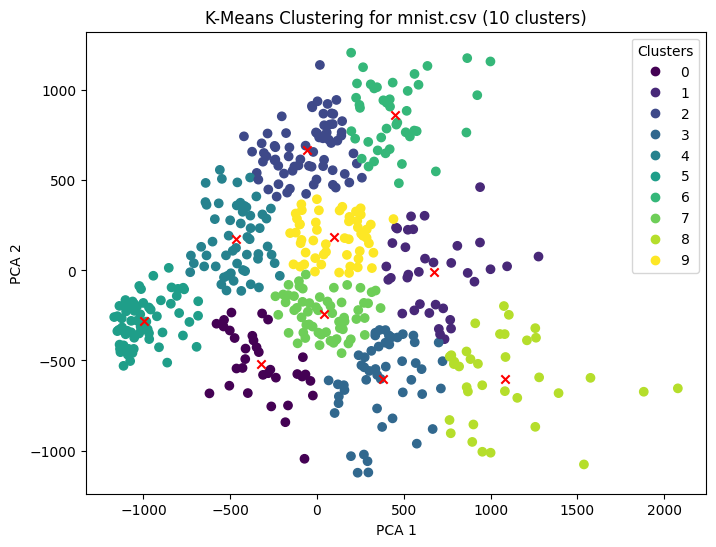

In [201]:
# Plot for 3, 5, 10 clasters
for p in (3, 5, 10):
  plot_clusters(p)

### візуалізація